In [8]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from skyfield import api

In [9]:
# TLE (Two-Line Element) data from Celestrak for satellite ISS(NAUKA)
station_data = api.load.tle('https://celestrak.com/NORAD/elements/stations.txt')
iss = station_data['ISS (NAUKA)']  # International Space Station
print(iss)

ISS (NAUKA) catalog #49044 epoch 2024-11-16 05:42:08 UTC


In [10]:
# Time range for tracking the satellite
minutes = range(60 * 2)  # 2 hours in minutes
time_scale = api.load.timescale()
time_range = time_scale.utc(2024, 2, 21, 2, minutes)


In [11]:
# Specifying the observer's location (Wah Cantt, Pakistan)
location = api.Topos(latitude='33.7490 N', longitude='72.7511 E')

# Calculation of the satellite's position relative to the observer
altitudes = [] # How high above the horizon
azimuths = [] # Direction from North

for t in time_range:
    orbit = (iss - location).at(t)
    altitude, azimuth ,distance = orbit.altaz()
    altitudes.append(altitude.degrees)
    azimuths.append(azimuth.degrees)

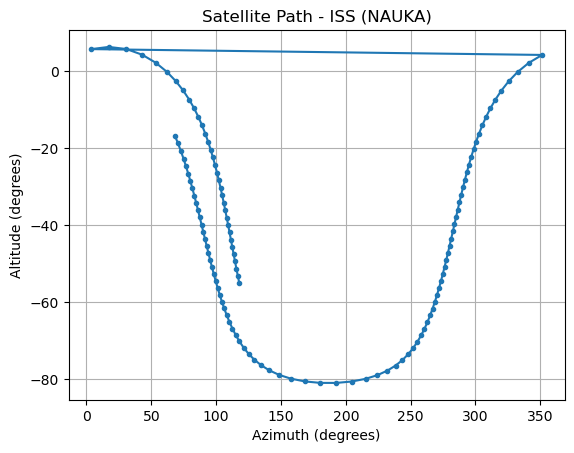

In [12]:
# Plotting Satellite Path
plt.plot(azimuths, altitudes, marker='.')
plt.title("Satellite Path - ISS (NAUKA)")
plt.xlabel("Azimuth (degrees)")
plt.ylabel("Altitude (degrees)")
plt.grid(True)
plt.show()

In [13]:
# Check when the satellite is visible (above the horizon)
visible_pass = np.array(altitudes) > 0
indices = np.where(visible_pass)[0]

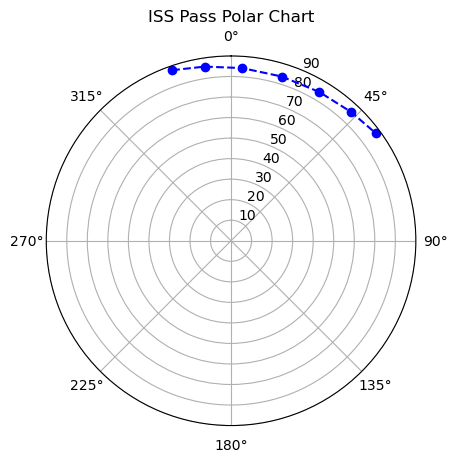

In [14]:
ax = plt.subplot(111, projection='polar')
plt.title("ISS Pass Polar Chart")
ax.set_rlim([0, 90])  # Set limits for altitude (0 to 90 degrees)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

θ = np.radians(azimuths)
r = 90 - np.array(altitudes)
ax.plot(θ[indices], r[indices], 'bo--')

plt.show()